In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.NSGA2 import nsga2
import algorithms.NSGA2.evolutionary_operators as nsga2_operators

from algorithms.MOEAD import moead, default_weight_vectors
import algorithms.MOEAD.evolutionary_operators as moead_operators

from algorithms.risk_measures import semi_variance

from data_loader import load_stock_quotations

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

# Load data

In [2]:
stock_quotations = load_stock_quotations()

delta_t = 90
stock_returns = stock_quotations.xs('close', level=1, axis=1).pct_change()
last_returns = stock_returns[-delta_t-1:-1]

stock_returns_mean = last_returns.mean() # predicted return for next day

# semi-variance as risk
stock_returns_semi_var = semi_variance(np.array(last_returns).T)

number_of_stocks = stock_returns.shape[1]

# Objective function

In [3]:
def portfolio_return_value(X):
    return X @ stock_returns_mean


def portfolio_risk_semi_var(X):
    return semi_variance(X @ np.array(last_returns).T)


def portfolio_objective_function(risk_function=portfolio_risk_semi_var,
                                 return_function=portfolio_return_value):
    return lambda X: np.c_[risk_function(X), -return_function(X)]

# Test

In [4]:
def show_results(stock_risk, objective_function, moead_kwargs, nsga2_kwargs, print_time=False):
    plt.xlabel('Risk')
    plt.ylabel('Return')

    if print_time:
        plt.title(f"MOEA/D: time: {moead_kwargs['max_time']}s, normalized: {moead_kwargs['normalize']}\n" +
                  f"NSGA-II: time: {nsga2_kwargs['max_time']}s, population size: {nsga2_kwargs['population_size']}")
    else:
        plt.title(f"MOEA/D: iterations: {moead_kwargs['number_of_iterations']}, normalized: {moead_kwargs['normalize']}\n" +
                  f"NSGA-II: iterations: {nsga2_kwargs['number_of_iterations']}, population size: {nsga2_kwargs['population_size']}")

    plt.scatter(stock_risk, stock_returns_mean, c='gray', label='Basic stocks')

    moead_result = moead(objective_function=objective_function,
                         chromosome_length=number_of_stocks,
                         **moead_kwargs)

    nsga2_result = nsga2(objective_function=objective_function,
                         chromosome_length=number_of_stocks,
                         **nsga2_kwargs)

    pareto_front_moead = objective_function(moead_result)
    pareto_front_nsga2 = objective_function(nsga2_result)

    plt.scatter(pareto_front_moead[:,0], -pareto_front_moead[:,1], c='r', label='MOEA/D')
    plt.scatter(pareto_front_nsga2[:,0], -pareto_front_nsga2[:,1], c='b', s=8, label='NSGA-II')

    plt.legend()
    plt.show()

NSGA-II: 100%|██████████| 300/300 [03:19<00:00,  1.51it/s]


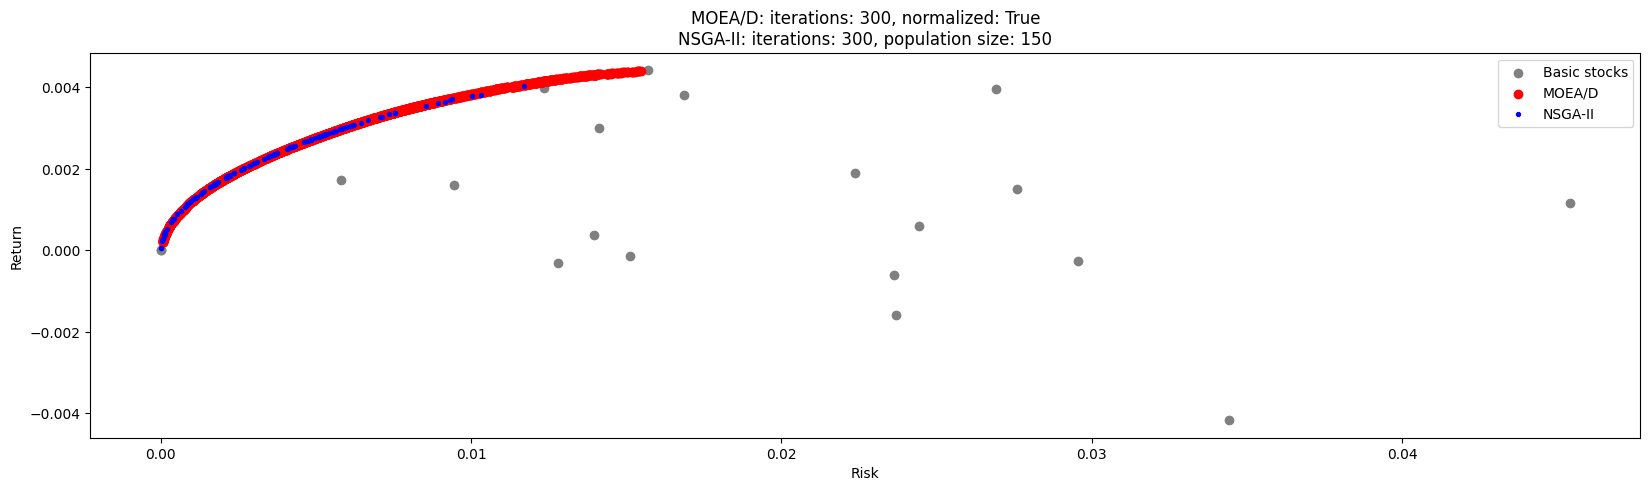

In [5]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 300,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 150,
                           'number_of_offspring': 300,
                           'number_of_iterations': 300,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75})

MOEA/D:   2%|▏         | 600/30000 [15:00<12:15:45,  1.50s/it]


MOEAD: exceeded maximum execution time!


NSGA-II:   1%|▏         | 375/30000 [15:01<19:46:35,  2.40s/it]


NSGA-II: exceeded maximum execution time!


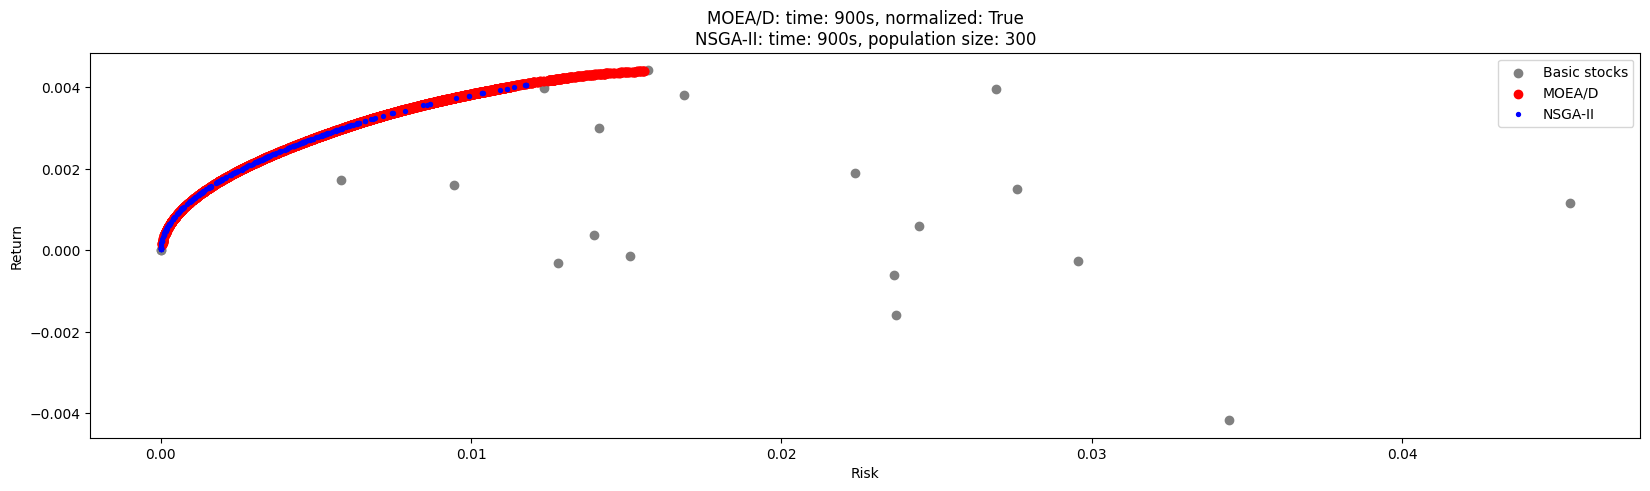

In [6]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 30000,
                           'max_time': 900,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 300,
                           'number_of_offspring': 600,
                           'number_of_iterations': 30000,
                           'max_time': 900,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75},
             print_time=True)

MOEA/D:   2%|▏         | 707/30000 [20:01<13:49:26,  1.70s/it]


MOEAD: exceeded maximum execution time!


NSGA-II:   1%|          | 179/30000 [20:02<55:40:00,  6.72s/it]


NSGA-II: exceeded maximum execution time!


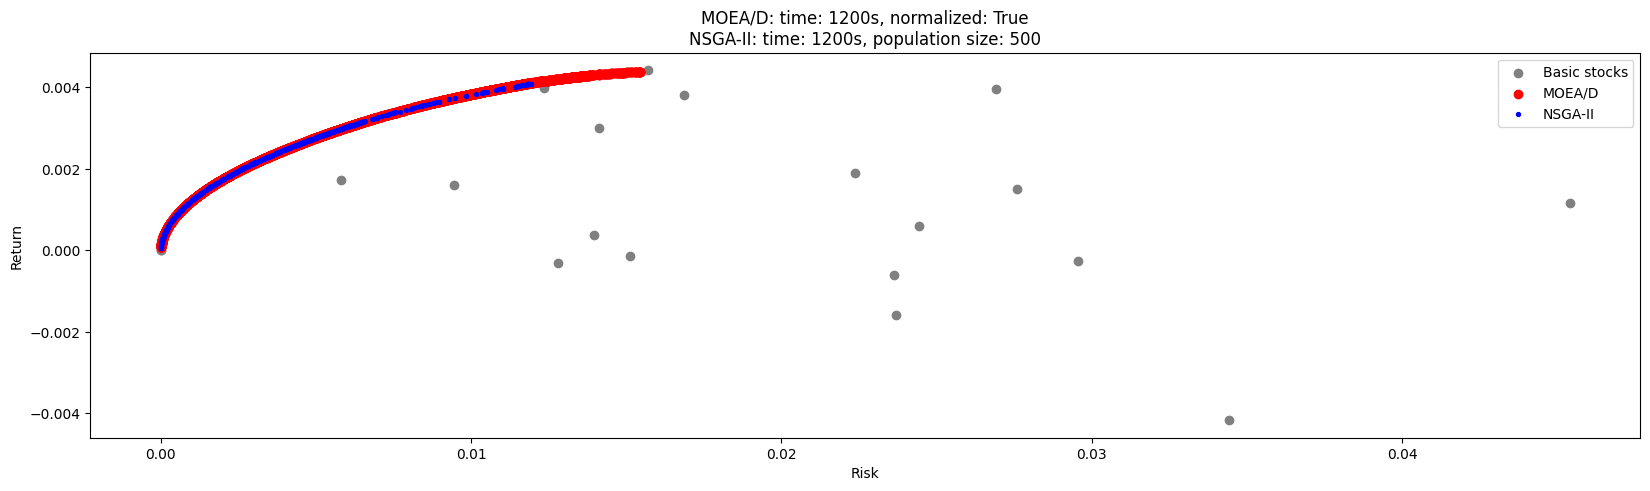

In [7]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 30000,
                           'max_time': 1200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 15,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 500,
                           'number_of_offspring': 1000,
                           'number_of_iterations': 30000,
                           'max_time': 1200,
                           'crossover_probability': 0.9,
                           'mutation_probability': 0.2,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.42},
             print_time=True)

# Test with best parameters

MOEA/D:   2%|▏         | 742/30000 [1:00:00<39:25:53,  4.85s/it]


MOEAD: exceeded maximum execution time!


NSGA-II:   1%|          | 327/30000 [1:00:00<90:44:44, 11.01s/it]


NSGA-II: exceeded maximum execution time!


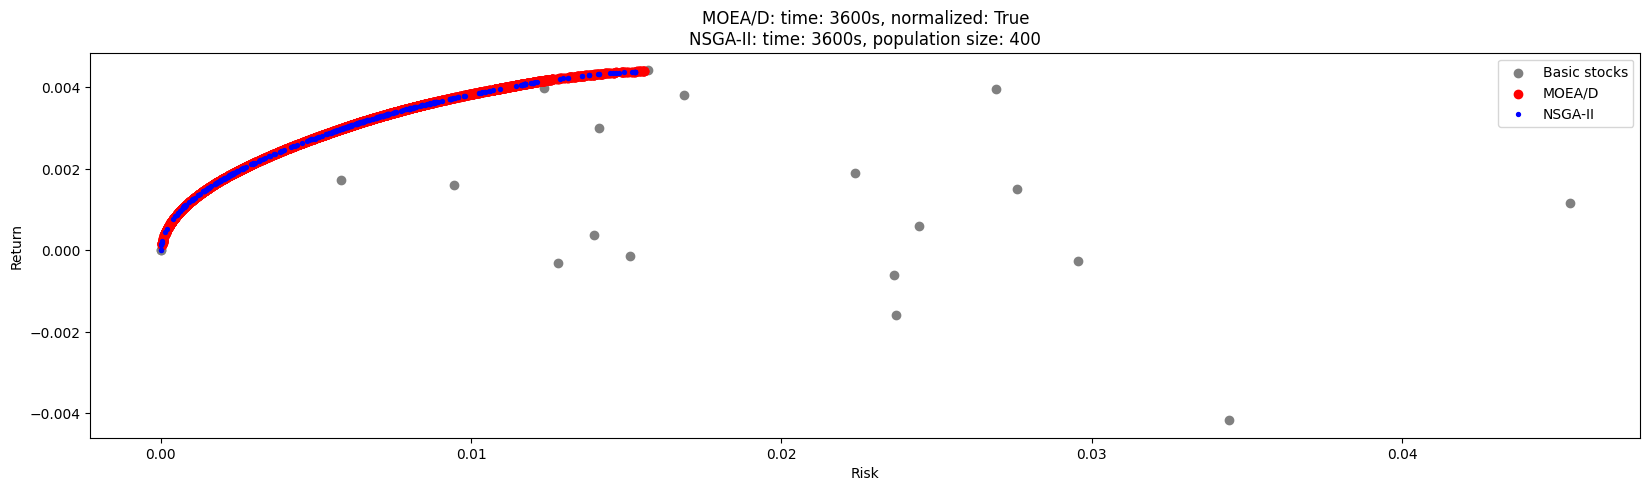

In [5]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 30000,
                           'max_time': 3600,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 400,
                           'number_of_offspring': 800,
                           'number_of_iterations': 30000,
                           'max_time': 3600,
                           'crossover_probability': 0.9,
                           'mutation_probability': 0.2,
                           'crossover_operator': nsga2_operators.single_point_crossover,
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75},
             print_time=True)